In [1]:
import matplotlib.pyplot as plt
import numpy as np
#plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'
#rcParams['font.sans-serif'] = ['Tahoma']


In [2]:

def read_in(file_path, total, read, solve, updateP, push, fill, gather, scatter, acc, load, part):
    
    # Read the file
    try:
        with open(file_path, 'r') as file:
            # Skip the first six lines
            for _ in range(6):
                next(file)
            
            # Read the rest of the file line by line
            for line in file:
                # Skip the separator line
                if line.startswith('='):
                    continue
                
                # Split the line into parts
                parts = line.split()
                
                # If the line is empty or does not have enough parts, skip it
                if not parts or len(parts) < 2:
                    continue
                
                # Extract the label and the last number
                last_number = float(parts[-1])
                
                if line.startswith('total'):
                    total.append(last_number)
                elif line.startswith('Read') or line.startswith('read'):
                    read.append(last_number)
                elif line.startswith('solve.'):
                    solve.append(last_number)
                elif line.startswith('updateP'):
                    updateP.append(last_number)
                elif line.startswith('pushV'):
                    push.append(last_number)
                elif line.startswith('pushP'):
                    push[-1] += last_number
                elif line.startswith('fill'):
                    fill.append(last_number)
                elif line.startswith('gather'):
                    gather.append(last_number)
                elif line.startswith('scatter'):
                    scatter.append(last_number)
                elif line.startswith('acc'):
                    acc.append(last_number)
                elif line.startswith('load'):
                    load.append(last_number)
                elif line.startswith('part'):
                    part.append(last_number)
        
                    
    except FileNotFoundError:
        print(file_path + " not found. Setting values to NaN")
        total.append(np.nan)
        read.append(np.nan)
        solve.append(np.nan)
        updateP.append(np.nan)
        push.append(np.nan)
        fill.append(np.nan)
        gather.append(np.nan)
        scatter.append(np.nan)
        acc.append(np.nan)
        load.append(np.nan)
        part.append(np.nan)
    
        


# total, pushPosition, pushVelocity, solve, gather, scatter, particleBC 


# communication: updateParticle, fillHalo, accumulateHalo,loadBalance

Text(0, 0.5, 'Fraction of time [%]')

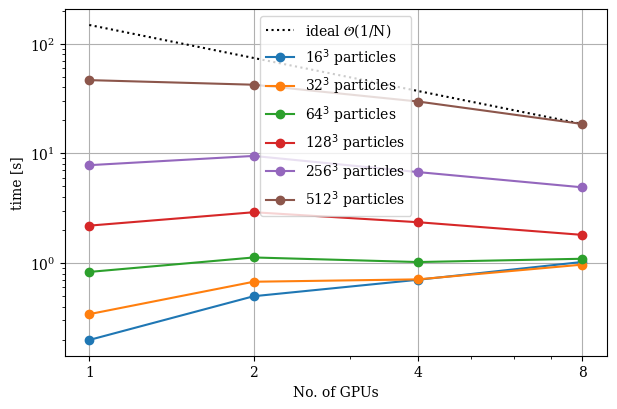

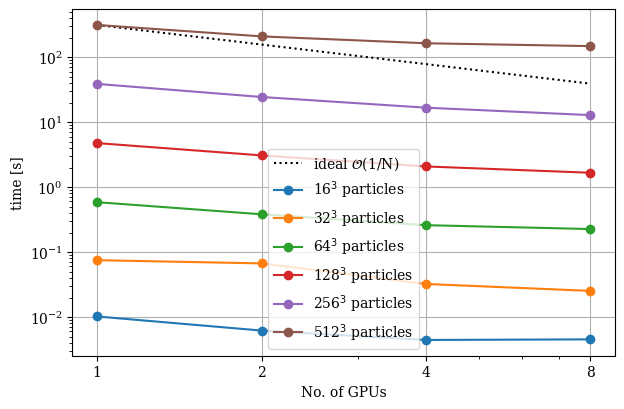

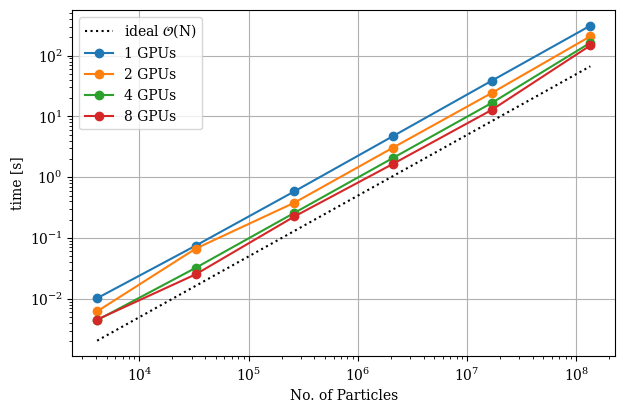

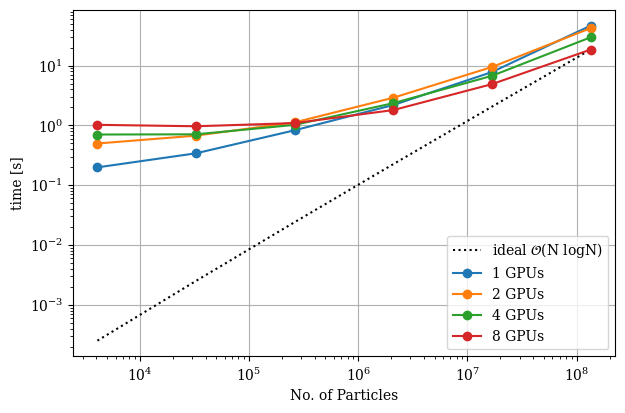

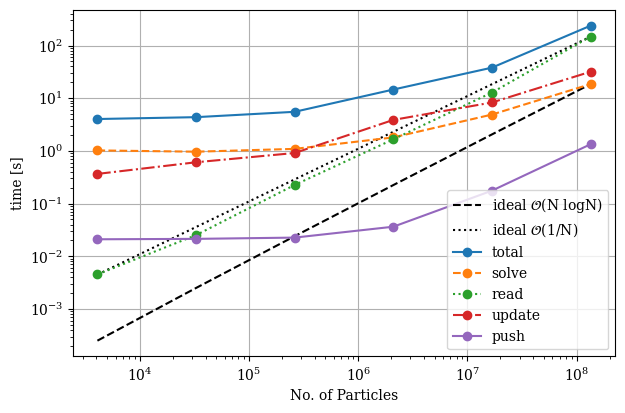

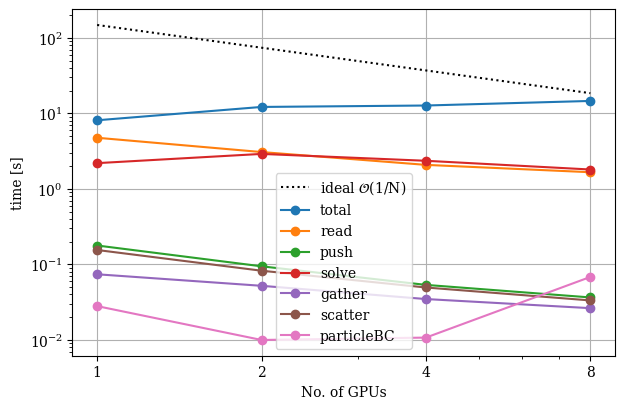

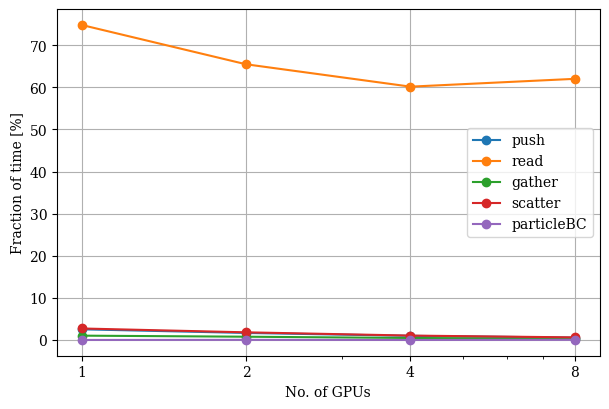

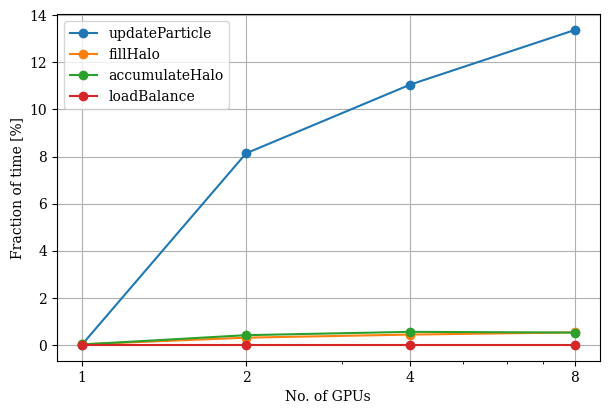

In [4]:
# GPUS 
#Define the file path
total = []
solve = []
read = []
updateP = []
push = []
fill = []
gather = []
scatter = []
acc = []
load = []
part = []

n_range = 2**np.arange(4)
N_part = 2**np.arange(4, 10)
path = 'timing_results/GPU/'

for N in N_part:
    for n in n_range:
        file_path = path + f'{N}/timing_{n}.dat'
        read_in(file_path, total, read, solve, updateP, push, fill, gather, scatter, acc, load, part)
    
total = np.asarray(total)
read = np.asarray(read)
solve = np.asarray(solve)
updateP = np.asarray(updateP)
push = np.asarray(push)
fill = np.asarray(fill)
gather = np.asarray(gather)
scatter = np.asarray(scatter)
acc = np.asarray(acc)
load = np.asarray(load)
part = np.asarray(part)

# Number of GPUs scaling for solver Time
plt.figure(figsize = (7, 4.5))
plt.loglog(n_range, solve[-1]/n_range*n_range[-1], ":k", label = "ideal $\mathcal{O}$(1/N)")
i = 0
for N in N_part:
    plt.loglog(n_range, solve[i*len(n_range):(i+1)*len(n_range)], "o-", label = fr"{N}$^3$ particles ")
    i += 1
#plt.title("Solver computation time 1 Node")
plt.xlabel("No. of GPUs")
plt.xticks([1,2,4,8])
plt.gca().set_xticklabels([1,2,4,8])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.ylabel("time [s]")
plt.grid(True)
plt.legend()
plt.savefig(path + "scaling_solver.png")



# Number of GPUs scaling for solver Time
plt.figure(figsize = (7,4.5))
plt.loglog(n_range, read[-len(n_range)]/n_range, ":k", label = "ideal $\mathcal{O}$(1/N)")
i = 0
for N in N_part:
    plt.loglog(n_range, read[i*len(n_range):(i+1)*len(n_range)], "o-", label = fr"{N}$^3$ particles ")
    i += 1
#plt.title("Read-In computation time 1 Node")
plt.xlabel("No. of GPUs")
plt.xticks([1,2,4,8])
plt.gca().set_xticklabels([1,2,4,8])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "scaling_read.png")


# Number of Particles scaling Read-In Time
plt.figure(figsize = (7,4.5))
i = 0
plt.loglog(N_part**3, N_part**3  / N_part[0]**3 * 0.2* read[0] , ":k", label = r"ideal $\mathcal{O}$(N)")
for n in n_range:
    plt.loglog(N_part**3, read[i::len(n_range)], "o-", color = f"C{i}", label = fr"{n} GPUs ")
    i += 1
plt.xlabel("No. of Particles")
plt.grid(True)
#plt.title("Read-In Time on 1 Node")
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "particle_scaling_read_in.png")



# Number of Particles scaling Solver Time
plt.figure(figsize = (7,4.5))
i = 0
plt.loglog(N_part**3, solve[-1] / N_part[-1]**3 / np.log(N_part[-1]) *N_part**3 * np.log(N_part), ":k", label = r"ideal $\mathcal{O}$(N logN)")
for n in n_range:
    plt.loglog(N_part**3, solve[i::len(n_range)], "o-", color = f"C{i}", label = fr"{n} GPUs ")
    i += 1
plt.xlabel("No. of Particles")
plt.grid(True)
#plt.title("Solver Time on 1 Node")
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "particle_scaling_solver.png")


# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
plt.loglog(N_part**3, solve[-1] / N_part[-1]**3 / np.log(N_part[-1]) *N_part**3 * np.log(N_part), "--k", label = r"ideal $\mathcal{O}$(N logN)")
plt.loglog(N_part**3, read[-1] / N_part[-1]**3 *N_part**3, ":k", label = r"ideal $\mathcal{O}$(1/N)")
#for n in n_range:
i = 3
plt.loglog(N_part**3, total[i::len(n_range)], "o-",  label = fr"total")
plt.loglog(N_part**3, solve[i::len(n_range)], "o--",label = fr"solve")
plt.loglog(N_part**3, read[i::len(n_range)], "o:", label = fr"read")
plt.loglog(N_part**3, updateP[i::len(n_range)], "o-.", label = fr"update")
plt.loglog(N_part**3, push[i::len(n_range)], "o-",  label = fr"push")

plt.xlabel("No. of Particles")
plt.grid(True)
#plt.title("Solver Time on 1 Node")
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "GPU_timings_1.png")



# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
plt.loglog(n_range, solve[-1]/n_range*n_range[-1], ":k", label = "ideal $\mathcal{O}$(1/N)")
#for n in n_range:
i = 3

# total, pushPosition, pushVelocity, solve, gather, scatter, particleBC 
# communication: updateParticle, fillHalo, accumulateHalo,loadBalance

plt.loglog(n_range, total[i*len(n_range):(i+1)*len(n_range)], "o-", label = "total")
plt.loglog(n_range, read[i*len(n_range):(i+1)*len(n_range)], "o-", label = "read")
plt.loglog(n_range, push[i*len(n_range):(i+1)*len(n_range)], "o-", label = "push")
plt.loglog(n_range, solve[i*len(n_range):(i+1)*len(n_range)], "o-", label = "solve")
plt.loglog(n_range, gather[i*len(n_range):(i+1)*len(n_range)], "o-", label = "gather")
plt.loglog(n_range, scatter[i*len(n_range):(i+1)*len(n_range)], "o-", label = "scatter")
plt.loglog(n_range, part[i*len(n_range):(i+1)*len(n_range)], "o-", label = "particleBC")

plt.xlabel("No. of GPUs")
plt.xticks([1,2,4,8])
plt.gca().set_xticklabels([1,2,4,8])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("time [s]")
#plt.savefig("GPU/GPU_timings_1.png")

# total, pushPosition, pushVelocity, solve, gather, scatter, particleBC 
# communication: updateParticle, fillHalo, accumulateHalo,loadBalance

i = 5
norm = total[i*len(n_range):(i+1)*len(n_range)]/100

# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
#plt.semilogx(n_range, total[(i)*len(n_range)]/n_range/norm, ":k", label = "ideal $\mathcal{O}$(1/N)")
#plt.semilogx(n_range, total[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "total")
plt.semilogx(n_range, push[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "push")
plt.semilogx(n_range, read[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "read")
#plt.semilogx(n_range, solve[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "solve")
plt.semilogx(n_range, gather[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "gather")
plt.semilogx(n_range, scatter[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "scatter")
plt.semilogx(n_range, part[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "particleBC")
plt.xlabel("No. of GPUs")
plt.xticks([1,2,4,8])
plt.gca().set_xticklabels([1,2,4,8])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("Fraction of time [%]")

# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
plt.semilogx(n_range, updateP[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "updateParticle")
plt.semilogx(n_range, fill[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "fillHalo")
plt.semilogx(n_range, acc[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "accumulateHalo")
plt.semilogx(n_range, load[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "loadBalance")
plt.xlabel("No. of GPUs")
plt.xticks([1,2,4,8])
plt.gca().set_xticklabels([1,2,4,8])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("Fraction of time [%]")



n-n-1-44/512/timing_2.dat not found. Setting values to NaN
n-n-1-44/512/timing_16.dat not found. Setting values to NaN


Text(0, 0.5, 'Fraction of time [%]')

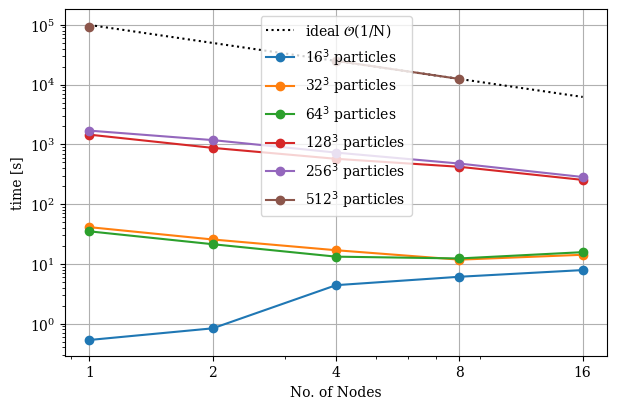

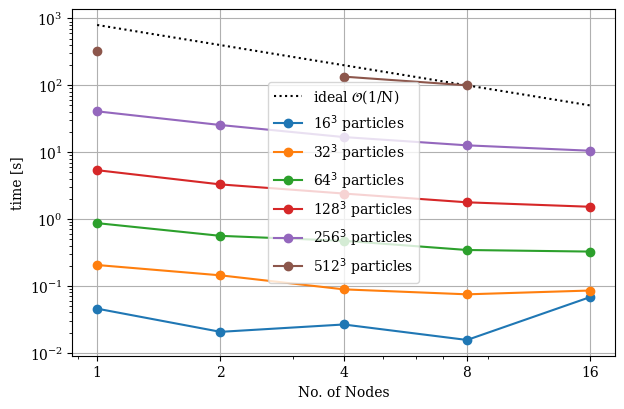

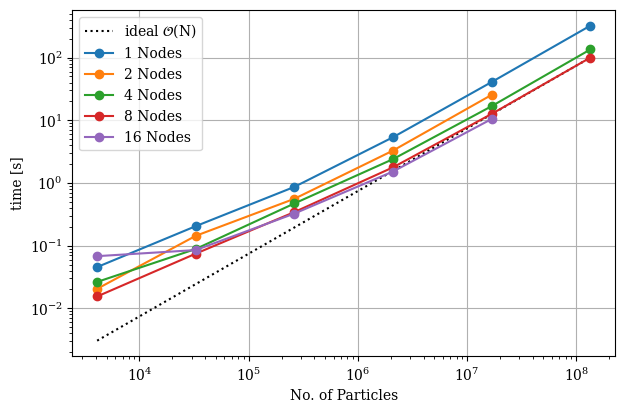

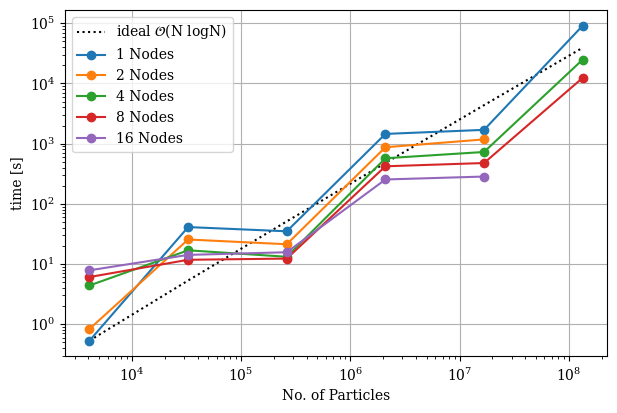

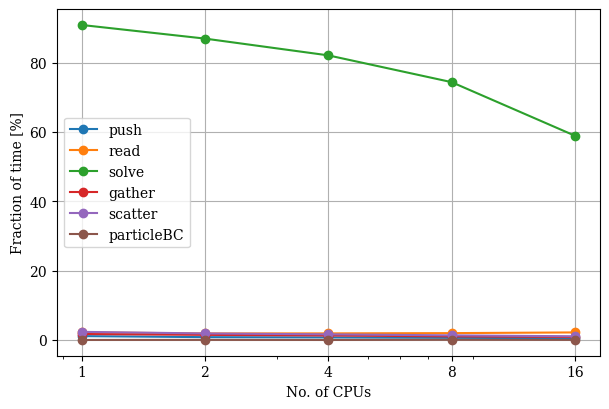

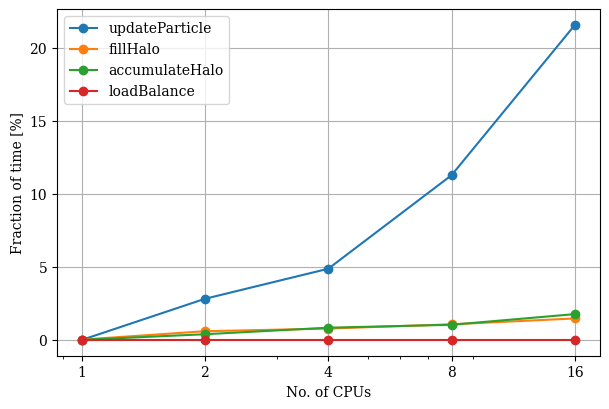

In [7]:
# N nodes, N tasks, 1 task per node, 44 cpus
# Define the file path
total = []
solve = []
read = []
updateP = []
push = []
fill = []
gather = []
scatter = []
acc = []
load = []
part = []

n_range = 2**np.arange(5)
N_part = 2**np.arange(4, 10)

path = "timing_results/CPU/"
for N in N_part:
    for n in n_range:
        file_path = path + f'{N}/timing_{n}.dat'
        read_in(file_path, total, read, solve, updateP, push, fill, gather, scatter, acc, load, part)
total = np.asarray(total)
read = np.asarray(read)
solve = np.asarray(solve)
updateP = np.asarray(updateP)
push = np.asarray(push)
fill = np.asarray(fill)
gather = np.asarray(gather)
scatter = np.asarray(scatter)
acc = np.asarray(acc)
load = np.asarray(load)
part = np.asarray(part)

# Number of Nodes scaling for solver Time
plt.figure(figsize = (7, 4.5))
plt.loglog(n_range, solve[-2]*n_range[-2]/n_range, ":k", label = "ideal $\mathcal{O}$(1/N)")
i = 0
for N in N_part:
    plt.loglog(n_range, solve[i*len(n_range):(i+1)*len(n_range)], "o-", label = fr"{N}$^3$ particles ")
    i += 1
#plt.title("Solver computation time 1 MPI rank per Node using 44 CPUs per rank")
plt.xlabel("No. of Nodes")
plt.xticks([1,2,4,8,16])
plt.gca().set_xticklabels([1,2,4,8,16])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path +"node_scaling_solver.png")

# Number of Nodes scaling for readin Time
plt.figure(figsize = (7, 4.5))
plt.loglog(n_range, read[-2]*n_range[-2]/n_range, ":k", label = "ideal $\mathcal{O}$(1/N)")
i = 0
for N in N_part:
    plt.loglog(n_range, read[i*len(n_range):(i+1)*len(n_range)], "o-", label = fr"{N}$^3$ particles ")
    i += 1
#plt.title("Read-In computation time 1 MPI rank per Node using 44 CPUs per rank")
plt.xlabel("No. of Nodes")
plt.xticks([1,2,4,8,16])
plt.gca().set_xticklabels([1,2,4,8,16])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path +"node_scaling_read_in.png")

# Number of Particles scaling Read-In Time
plt.figure(figsize = (7,4.5))
i = 0
plt.loglog(N_part**3, N_part**3  * read[-2] / N_part[-1]**3, ":k", label = r"ideal $\mathcal{O}$(N)")
for n in n_range:
    #plt.loglog(N_part**3, total[i::len(n_range)], "o-", label = fr"{n} MPI ranks ")
    plt.loglog(N_part**3, read[i::len(n_range)], "o-", color = f"C{i}", label = fr"{n} Nodes ")
    i += 1
plt.xlabel("No. of Particles")
plt.grid(True)
#plt.title("Read-In Time on 1 MPI rank per Node using 44 CPUs per rank")
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "node_particle_scaling_read_in.png")


# Number of Particles scaling Solver Time
plt.figure(figsize = (7,4.5))
i = 0
plt.loglog(N_part**3, N_part**3 * np.log(N_part) / N_part[0]**3 / np.log(N_part[0]) * (solve[0]+solve[0])*0.5, ":k", label = r"ideal $\mathcal{O}$(N logN)")
for n in n_range:
    plt.loglog(N_part**3, solve[i::len(n_range)], "o-", color = f"C{i}", label = fr"{n} Nodes ")
    i += 1
plt.xlabel("No. of Particles")
plt.grid(True)
#plt.title("Solver Time on 1 MPI rank per Node using 44 CPUs per rank")
plt.legend()
plt.ylabel("time [s]")
plt.savefig(path + "node_particle_scaling_solver.png")



# total, pushPosition, pushVelocity, solve, gather, scatter, particleBC 
# communication: updateParticle, fillHalo, accumulateHalo,loadBalance

i = 4
norm = total[i*len(n_range):(i+1)*len(n_range)]/100

# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
#plt.semilogx(n_range, total[(i)*len(n_range)]/n_range/norm, ":k", label = "ideal $\mathcal{O}$(1/N)")
#plt.semilogx(n_range, total[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "total")
plt.semilogx(n_range, push[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "push")
plt.semilogx(n_range, read[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "read")
plt.semilogx(n_range, solve[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "solve")
plt.semilogx(n_range, gather[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "gather")
plt.semilogx(n_range, scatter[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "scatter")
plt.semilogx(n_range, part[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "particleBC")
plt.xlabel("No. of CPUs")
plt.xticks([1,2,4,8, 16])
plt.gca().set_xticklabels([1,2,4,8, 16])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("Fraction of time [%]")

# Number of Particles procentual on 1 GPU
plt.figure(figsize = (7,4.5))
plt.semilogx(n_range, updateP[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "updateParticle")
plt.semilogx(n_range, fill[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "fillHalo")
plt.semilogx(n_range, acc[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "accumulateHalo")
plt.semilogx(n_range, load[i*len(n_range):(i+1)*len(n_range)]/norm, "o-", label = "loadBalance")
plt.xlabel("No. of CPUs")
plt.xticks([1,2,4,8, 16])
plt.gca().set_xticklabels([1,2,4,8, 16])
plt.gca().xaxis.set_minor_formatter(plt.NullFormatter())
plt.grid(True)
plt.legend()
plt.ylabel("Fraction of time [%]")